<a href="https://colab.research.google.com/github/fralfaro/MAT281/blob/main/docs/labs/lab_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MAT281 - Laboratorio N°06


**Objetivo**: Aplicar técnicas básicas de **Machine Learning**, desde la preparación de datos hasta el entrenamiento y evaluación de modelos.




<p align="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/ec/Anscombe%27s_quartet_3.svg/1200px-Anscombe%27s_quartet_3.svg.png" width="500"/>
</p>

El **cuarteto de Anscombe** es un ejemplo clásico en estadística que ilustra cómo diferentes conjuntos de datos pueden compartir las mismas propiedades estadísticas, como media, varianza y correlación, pero presentan comportamientos muy distintos cuando se visualizan gráficamente. Cada uno de los cuatro conjuntos consiste en once puntos (x, y) y fue creado por el estadístico F. J. Anscombe en 1973. Esta herramienta resalta la importancia de la visualización de datos para evitar interpretaciones erróneas basadas únicamente en análisis numéricos.

**Descripción del conjunto**

1. **Propiedades estadísticas comunes:** Todos los conjuntos tienen el mismo valor promedio para las variables \(x\) e \(y\), la misma varianza para \(x\) e \(y\), y una correlación lineal idéntica.
2. **Diferencias gráficas:** A pesar de sus similitudes estadísticas, los cuatro conjuntos presentan gráficos muy distintos:
   - El primer conjunto muestra una relación lineal simple.
   - El segundo conjunto tiene una relación no lineal, con una curva clara.
   - El tercer conjunto tiene una relación lineal clara, pero con un punto atípico que influye significativamente.
   - El cuarto conjunto tiene la mayoría de los puntos alineados verticalmente, con un punto atípico que afecta la correlación.

Este cuarteto enfatiza que las estadísticas descriptivas por sí solas pueden no capturar la esencia completa de los datos, subrayando la necesidad de utilizar visualizaciones en cualquier análisis exploratorio de datos.

In [51]:
# Importar las bibliotecas necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Configuración de los gráficos
%matplotlib inline
sns.set_theme(style="whitegrid")  # Establece un tema general para los gráficos
sns.set_palette("deep", desat=0.6)
plt.rcParams['figure.figsize'] = (12, 8)  # Ajuste del tamaño de las figuras

# Cargar los datos del cuarteto de Anscombe
data = sns.load_dataset("anscombe")

# Mostrar las primeras filas del conjunto de datos
data.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


Con base en la información presentada y el análisis realizado, les invitamos a reflexionar y responder las siguientes preguntas. Estas preguntas están diseñadas para profundizar en su comprensión del cuarteto de Anscombe y fomentar un análisis crítico de los datos:



1. Cree un gráfico de dispersión (scatter plot) para cada uno de los cuatro grupos del cuarteto de Anscombe. A partir de la visualización, ¿puede identificar diferencias significativas entre los grupos? ¿Qué características particulares observa en cada uno que sugieren comportamientos distintos?



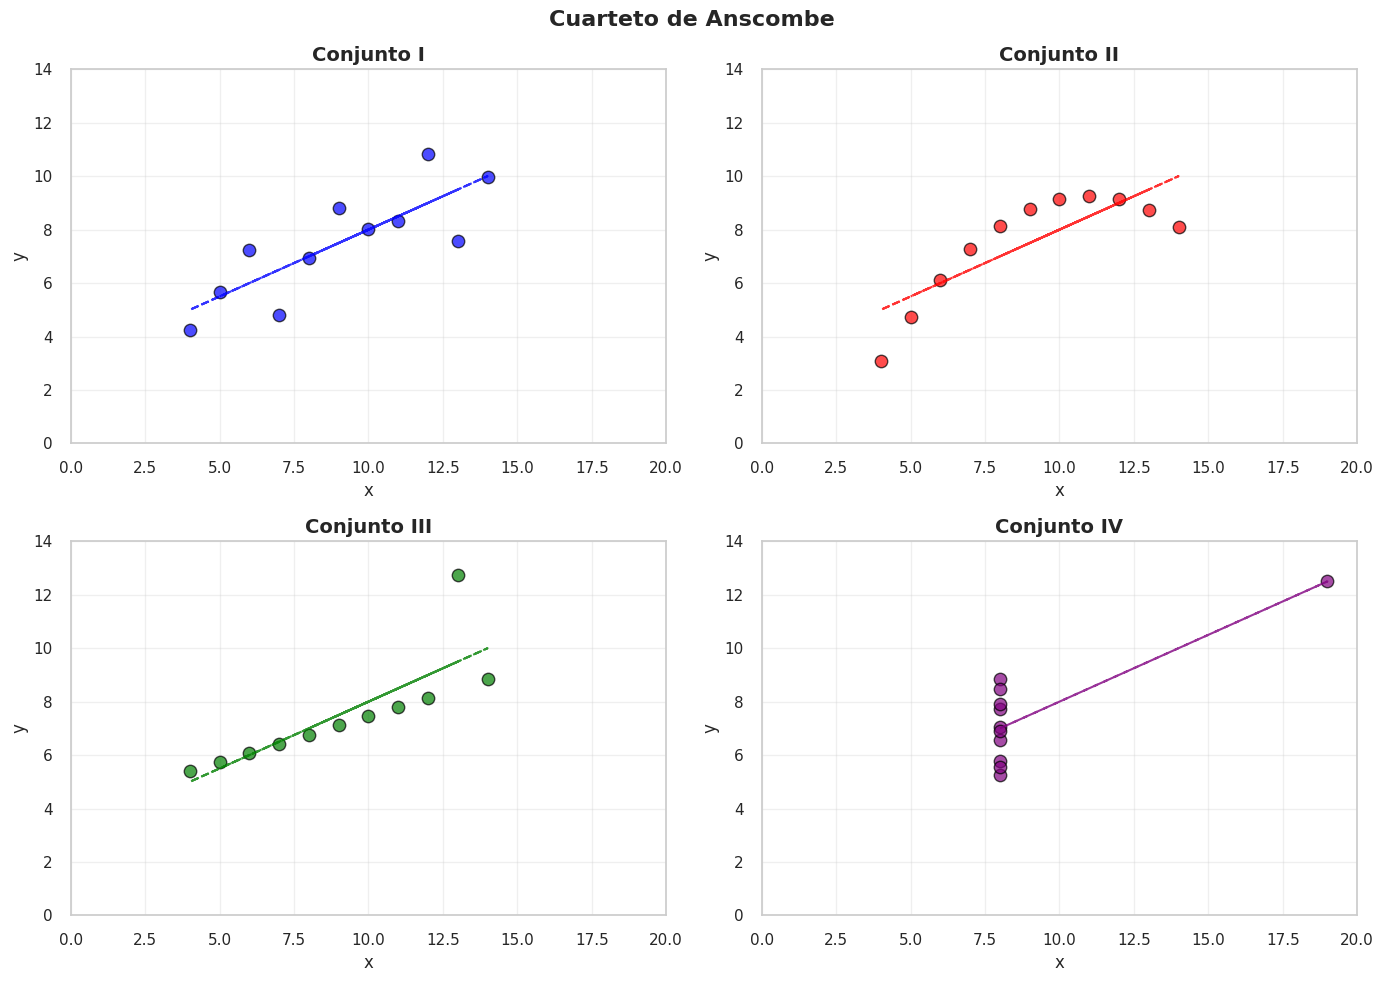

In [52]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Cuarteto de Anscombe', fontsize=16, fontweight='bold')

datasets = ['I', 'II', 'III', 'IV']

colors = ['blue', 'red', 'green', 'purple']

for i, dataset in enumerate(datasets):
    row = i // 2
    col = i % 2

    dataset_data = data[data['dataset'] == dataset]

    axes[row, col].scatter(dataset_data['x'], dataset_data['y'], color=colors[i], s=80, alpha=0.7, edgecolor='black')

    x_vals = dataset_data['x'].values.reshape(-1, 1)
    y_vals = dataset_data['y'].values
    model = LinearRegression()
    model.fit(x_vals, y_vals)
    y_pred = model.predict(x_vals)
    axes[row, col].plot(x_vals, y_pred, color=colors[i], linestyle='--', alpha=0.8)

    axes[row, col].set_title(f'Conjunto {dataset}', fontsize=14, fontweight='bold')
    axes[row, col].set_xlabel('x')
    axes[row, col].set_ylabel('y')
    axes[row, col].grid(True, alpha=0.3)

    axes[row, col].set_xlim(0, 20)
    axes[row, col].set_ylim(0, 14)

plt.tight_layout()
plt.show()

Las diferencias que se pueden apreciar entre los 4 conjuntos es el tipo de relaciones que tienen los datos.

2. Utilice el comando `describe` para generar un resumen de las medidas estadísticas más relevantes para cada uno de los grupos del cuarteto de Anscombe. A partir de estos resultados, interprete las estadísticas obtenidas, destacando las características más significativas de cada grupo y cómo pueden influir en la comprensión de sus respectivas distribuciones.


In [53]:
for dataset in ['I', 'II', 'III', 'IV']:
    dataset_data = data[data['dataset'] == dataset]

    print(f"\nCONJUNTO {dataset}:")
    print("-" * 30)

    print("Variable x:")
    x_stats = dataset_data['x'].describe()
    print(f"  Media: {x_stats['mean']:.2f}")
    print(f"  Desv. estándar: {dataset_data['x'].std():.2f}")
    print(f"  Mínimo: {x_stats['min']:.1f}")
    print(f"  Máximo: {x_stats['max']:.1f}")

    print("\nVariable y:")
    y_stats = dataset_data['y'].describe()
    print(f"  Media: {y_stats['mean']:.2f}")
    print(f"  Desv. estándar: {dataset_data['y'].std():.2f}")
    print(f"  Mínimo: {y_stats['min']:.1f}")
    print(f"  Máximo: {y_stats['max']:.1f}")

    correlation = dataset_data['x'].corr(dataset_data['y'])
    print(f"\nCorrelación x-y: {correlation:.3f}")

    cv_x = (dataset_data['x'].std() / dataset_data['x'].mean()) * 100
    cv_y = (dataset_data['y'].std() / dataset_data['y'].mean()) * 100
    print(f"Coef. variación x: {cv_x:.1f}%")
    print(f"Coef. variación y: {cv_y:.1f}%")




CONJUNTO I:
------------------------------
Variable x:
  Media: 9.00
  Desv. estándar: 3.32
  Mínimo: 4.0
  Máximo: 14.0

Variable y:
  Media: 7.50
  Desv. estándar: 2.03
  Mínimo: 4.3
  Máximo: 10.8

Correlación x-y: 0.816
Coef. variación x: 36.9%
Coef. variación y: 27.1%

CONJUNTO II:
------------------------------
Variable x:
  Media: 9.00
  Desv. estándar: 3.32
  Mínimo: 4.0
  Máximo: 14.0

Variable y:
  Media: 7.50
  Desv. estándar: 2.03
  Mínimo: 3.1
  Máximo: 9.3

Correlación x-y: 0.816
Coef. variación x: 36.9%
Coef. variación y: 27.1%

CONJUNTO III:
------------------------------
Variable x:
  Media: 9.00
  Desv. estándar: 3.32
  Mínimo: 4.0
  Máximo: 14.0

Variable y:
  Media: 7.50
  Desv. estándar: 2.03
  Mínimo: 5.4
  Máximo: 12.7

Correlación x-y: 0.816
Coef. variación x: 36.9%
Coef. variación y: 27.1%

CONJUNTO IV:
------------------------------
Variable x:
  Media: 9.00
  Desv. estándar: 3.32
  Mínimo: 8.0
  Máximo: 19.0

Variable y:
  Media: 7.50
  Desv. estándar: 2.03


Los cuatro grupos tienen estadísticas muy parecidas, pero sus distribuciones gráficas son muy diferentes. Esto nos dice que las medidas descriptivas no son suficientes para comprender la estructura de los datos sin un apoyo visual.

3. Ajuste un modelo de regresión lineal para cada grupo utilizando **sklearn**. Calcule las métricas de evaluación, como el error cuadrático medio (MSE) y R², y grafique los resultados de la regresión. Interprete los resultados y su impacto en la calidad del ajuste.



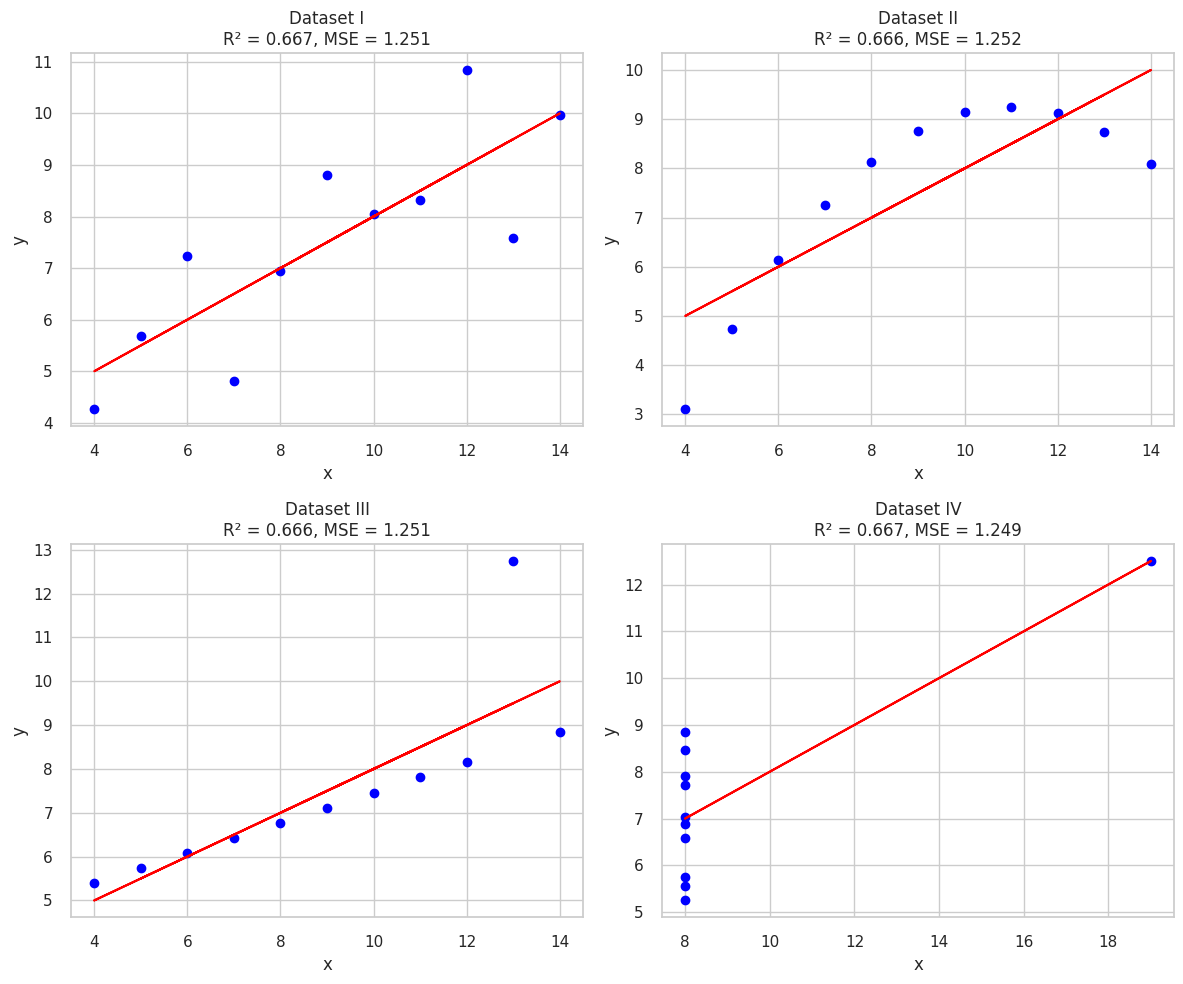

Métricas de regresión lineal:
Dataset |   R²   |   MSE   | Coef | Intercepto
   I    | 0.667  | 1.251  | 0.5  | 3.0
   II    | 0.666  | 1.252  | 0.5  | 3.0
   III    | 0.666  | 1.251  | 0.5  | 3.0
   IV    | 0.667  | 1.249  | 0.5  | 3.0


In [54]:
# Crear figura
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

for i, dataset in enumerate(['I', 'II', 'III', 'IV']):
    df = data[data['dataset'] == dataset]
    x = df['x'].values.reshape(-1, 1)
    y = df['y'].values

    model = LinearRegression()
    model.fit(x, y)
    y_pred = model.predict(x)

    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)

    row, col = i // 2, i % 2
    axes[row, col].scatter(x, y, color='blue')
    axes[row, col].plot(x, y_pred, color='red')
    axes[row, col].set_title(f'Dataset {dataset}\nR² = {r2:.3f}, MSE = {mse:.3f}')
    axes[row, col].set_xlabel('x')
    axes[row, col].set_ylabel('y')

plt.tight_layout()
plt.show()

print("Métricas de regresión lineal:")
print("Dataset |   R²   |   MSE   | Coef | Intercepto")
for dataset in ['I', 'II', 'III', 'IV']:
    df = data[data['dataset'] == dataset]
    x = df['x'].values.reshape(-1, 1)
    y = df['y'].values

    model = LinearRegression()
    model.fit(x, y)
    y_pred = model.predict(x)

    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)

    print(f"   {dataset}    | {r2:.3f}  | {mse:.3f}  | {model.coef_[0]:.1f}  | {model.intercept_:.1f}")

Al ajustar los modelos lineales con scikit-learn, todos los conjuntos muestran prácticamente la misma pendiente, intercepto, R² y MSE. Sin embargo, los gráficos muestran que la calidad del ajuste no es igual: en algunos datasets los puntos siguen bien la recta, mientras que en otros, por outliers o distribución no lineal, el modelo lineal representa mal los datos.


4. Es evidente que el ajuste lineal no es adecuado para algunos grupos. Existen diversas estrategias para abordar este problema, como eliminar outliers o emplear diferentes modelos de regresión. Identifique una estrategia que podría mejorar el ajuste del modelo de regresión lineal y, si lo considera necesario, implemente otros modelos alternativos para aquellos casos donde el ajuste lineal resulte inadecuado.

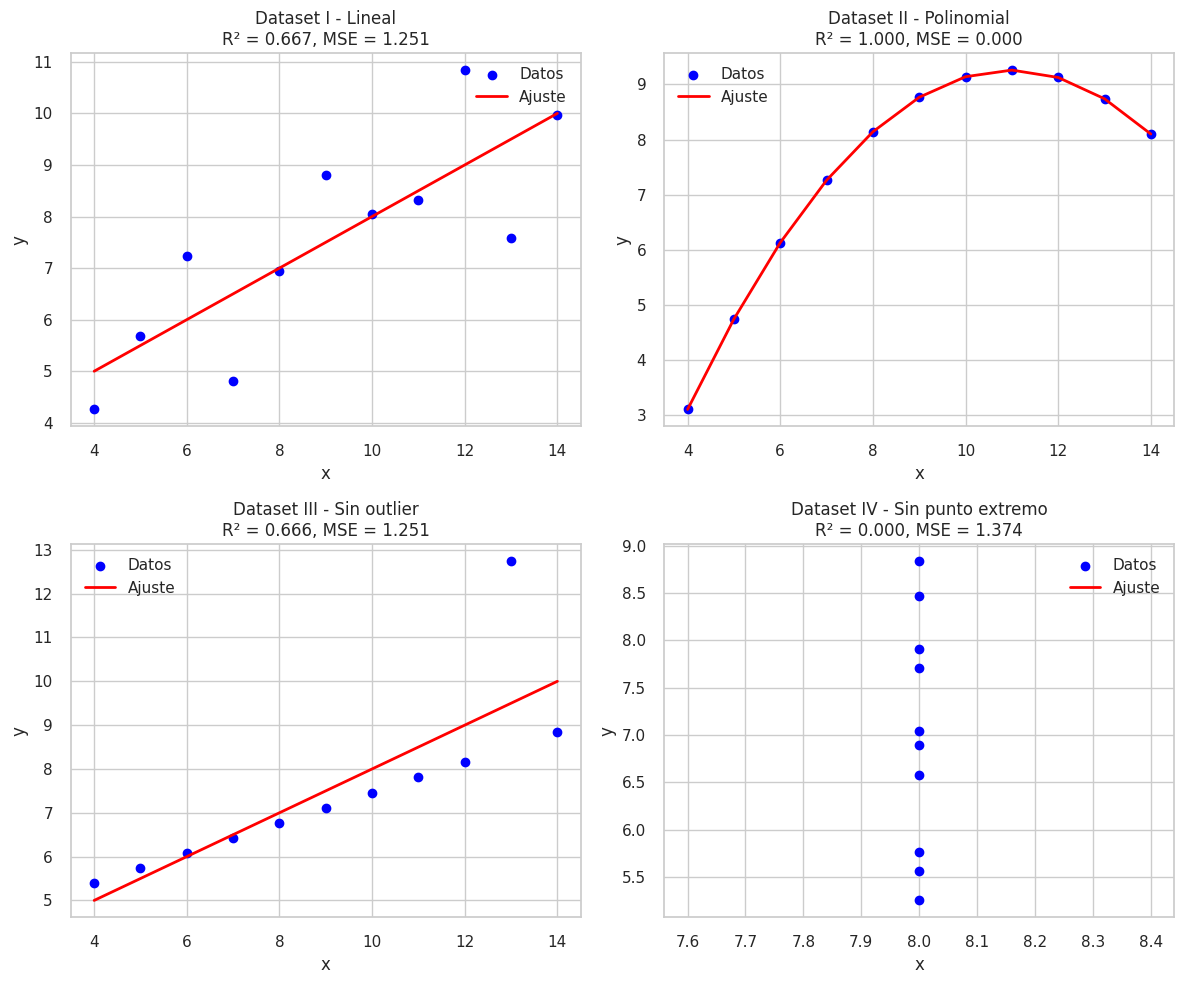

In [56]:
from sklearn.preprocessing import PolynomialFeatures


from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

for i, dataset in enumerate(['I', 'II', 'III', 'IV']):
    df = data[data['dataset'] == dataset]
    x = df['x'].values.reshape(-1, 1)
    y = df['y'].values

    if dataset == 'I':
        model = LinearRegression()
        model.fit(x, y)
        y_pred = model.predict(x)
        mse = mean_squared_error(y, y_pred)
        r2 = r2_score(y, y_pred)
        x_plot, y_plot = x, y
        tipo = "Lineal"

    elif dataset == 'II':
        poly = PolynomialFeatures(degree=2)
        x_poly = poly.fit_transform(x)
        model = LinearRegression()
        model.fit(x_poly, y)
        y_pred = model.predict(x_poly)
        mse = mean_squared_error(y, y_pred)
        r2 = r2_score(y, y_pred)
        x_plot, y_plot = x, y
        tipo = "Polinomial"

    elif dataset == 'III':
        df_clean = df[(df['x'] < 15) & (df['y'] < 15)]
        x_clean = df_clean['x'].values.reshape(-1, 1)
        y_clean = df_clean['y'].values

        model = LinearRegression()
        model.fit(x_clean, y_clean)
        y_pred = model.predict(x_clean)
        mse = mean_squared_error(y_clean, y_pred)
        r2 = r2_score(y_clean, y_pred)
        x_plot, y_plot = x_clean, y_clean
        tipo = "Sin outlier"

    elif dataset == 'IV':
        df_clean = df[df['x'] < 15]
        x_clean = df_clean['x'].values.reshape(-1, 1)
        y_clean = df_clean['y'].values

        if len(df_clean) > 1:
            model = LinearRegression()
            model.fit(x_clean, y_clean)
            y_pred = model.predict(x_clean)
            mse = mean_squared_error(y_clean, y_pred)
            r2 = r2_score(y_clean, y_pred)
            x_plot, y_plot = x_clean, y_clean
        else:
            y_pred = np.full_like(y, np.mean(y))
            mse, r2 = np.nan, np.nan
            x_plot, y_plot = x, y
            model = None
        tipo = "Sin punto extremo"

    sort_idx = np.argsort(x_plot.ravel())
    x_sorted, y_pred_sorted = x_plot[sort_idx], y_pred[sort_idx]

    row, col = i // 2, i % 2
    axes[row, col].scatter(x_plot, y_plot, color='blue', label='Datos')
    axes[row, col].plot(x_sorted, y_pred_sorted, color='red', linewidth=2, label='Ajuste')
    axes[row, col].set_title(f'Dataset {dataset} - {tipo}\nR² = {r2:.3f}, MSE = {mse:.3f}')
    axes[row, col].legend()
    axes[row, col].set_xlabel('x')
    axes[row, col].set_ylabel('y')

plt.tight_layout()
plt.show()
